## Project Name : Insurance Claims- Fraud Detection

# Dataset Description

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

This dataset has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

We will be working with some auto insurance data to demonstrate how we can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
                                          ''' Importing libraries '''

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
df.shape

(1000, 40)

In [5]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [6]:
                                          ''' Finding the Null Values '''

df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

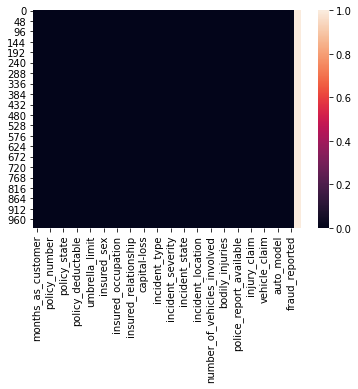

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.drop(columns = "_c39", inplace = True)

In [9]:
df.shape

(1000, 39)

In [10]:
df.isna().values.any()

False

This verifies we have no null values in the dataset.

## Exploratory Data Analysis:

<Figure size 864x432 with 0 Axes>

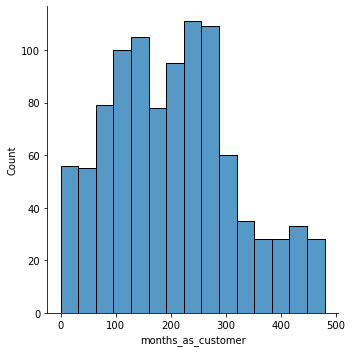

<Figure size 864x432 with 0 Axes>

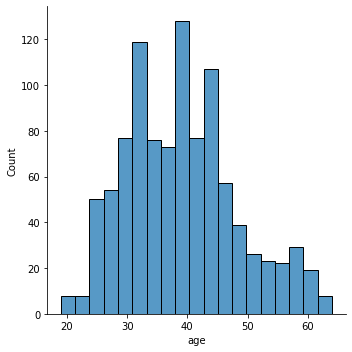

<Figure size 864x432 with 0 Axes>

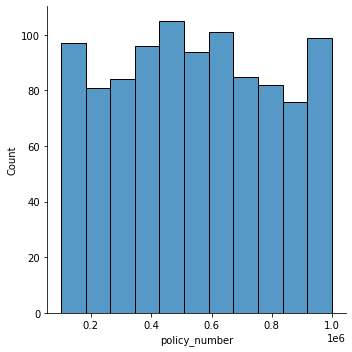

<Figure size 864x432 with 0 Axes>

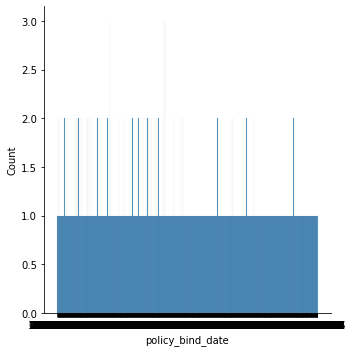

<Figure size 864x432 with 0 Axes>

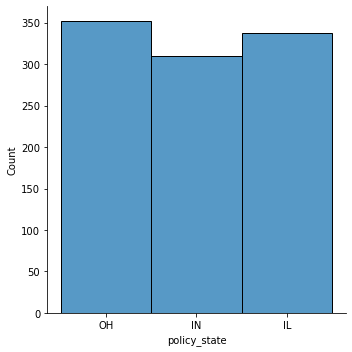

<Figure size 864x432 with 0 Axes>

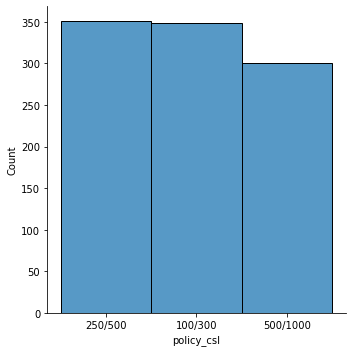

<Figure size 864x432 with 0 Axes>

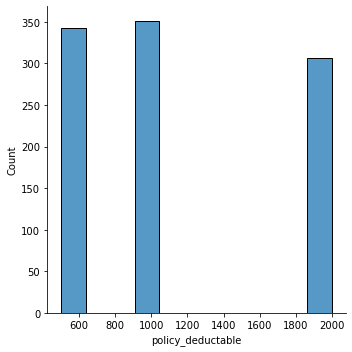

<Figure size 864x432 with 0 Axes>

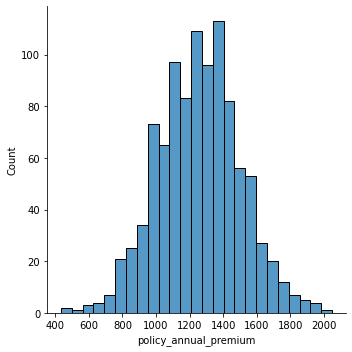

<Figure size 864x432 with 0 Axes>

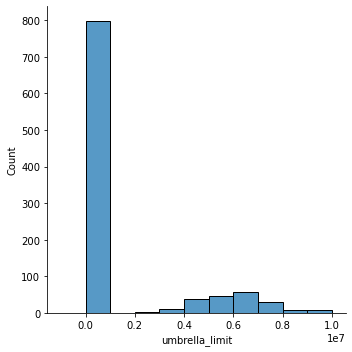

<Figure size 864x432 with 0 Axes>

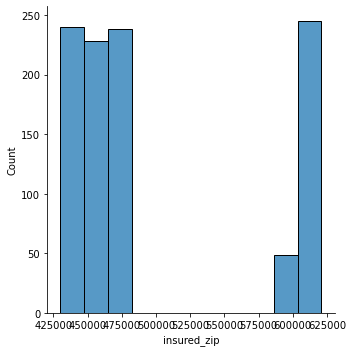

<Figure size 864x432 with 0 Axes>

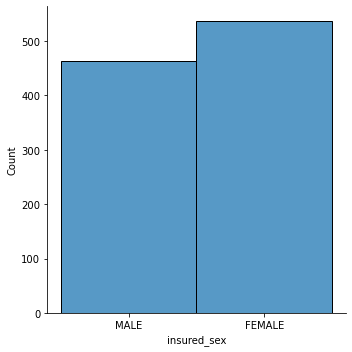

<Figure size 864x432 with 0 Axes>

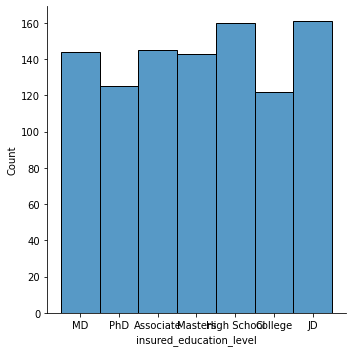

<Figure size 864x432 with 0 Axes>

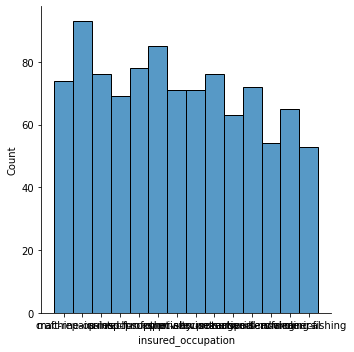

<Figure size 864x432 with 0 Axes>

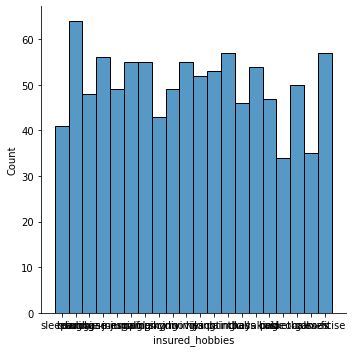

<Figure size 864x432 with 0 Axes>

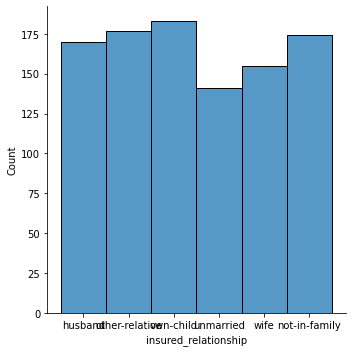

<Figure size 864x432 with 0 Axes>

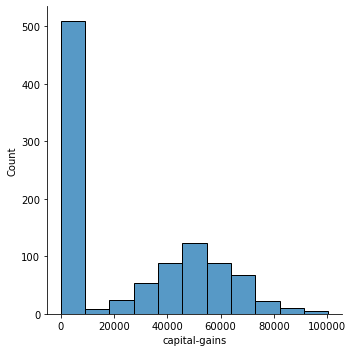

<Figure size 864x432 with 0 Axes>

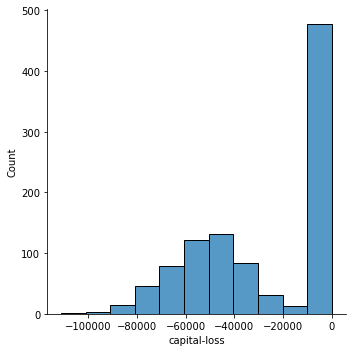

<Figure size 864x432 with 0 Axes>

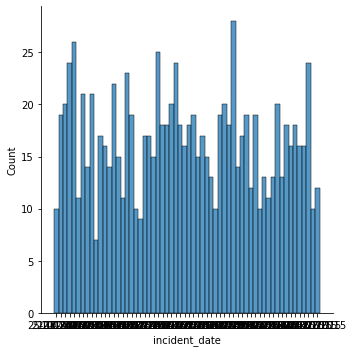

<Figure size 864x432 with 0 Axes>

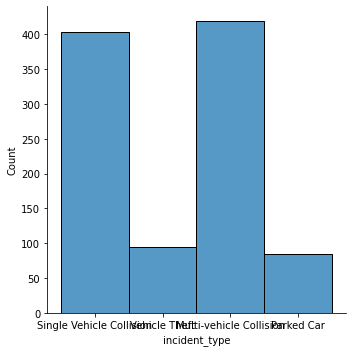

<Figure size 864x432 with 0 Axes>

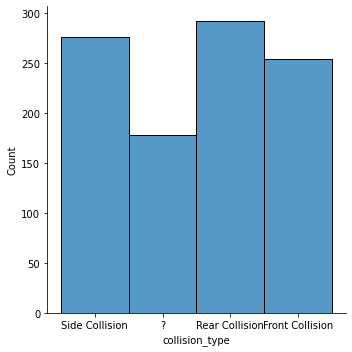

<Figure size 864x432 with 0 Axes>

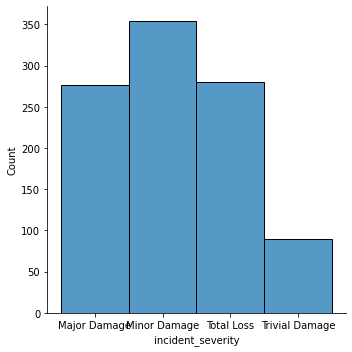

<Figure size 864x432 with 0 Axes>

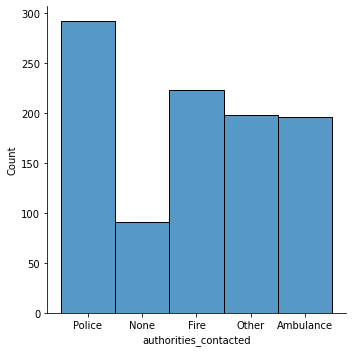

<Figure size 864x432 with 0 Axes>

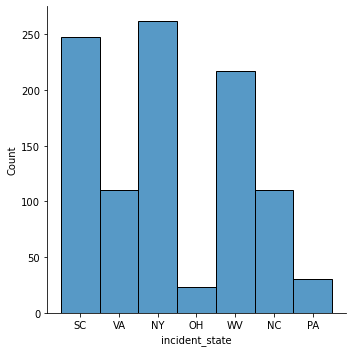

<Figure size 864x432 with 0 Axes>

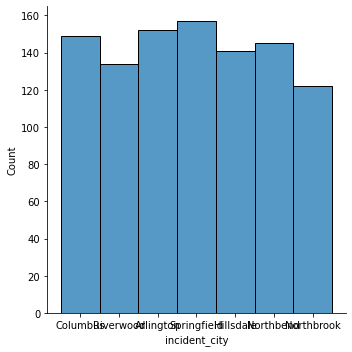

<Figure size 864x432 with 0 Axes>

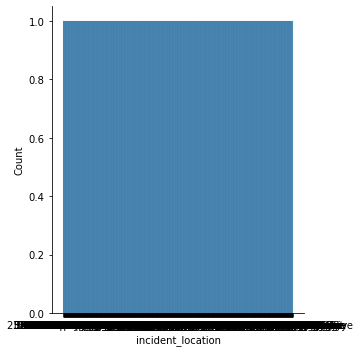

<Figure size 864x432 with 0 Axes>

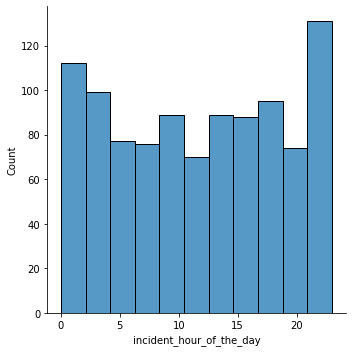

<Figure size 864x432 with 0 Axes>

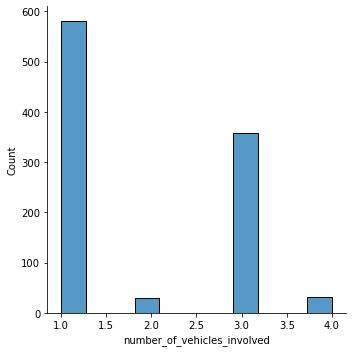

<Figure size 864x432 with 0 Axes>

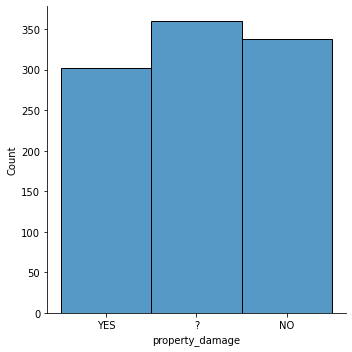

<Figure size 864x432 with 0 Axes>

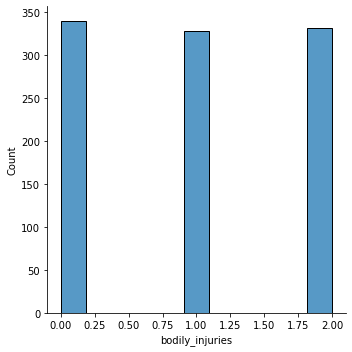

<Figure size 864x432 with 0 Axes>

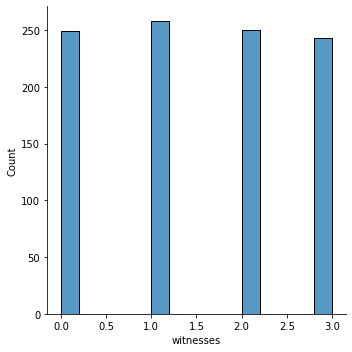

<Figure size 864x432 with 0 Axes>

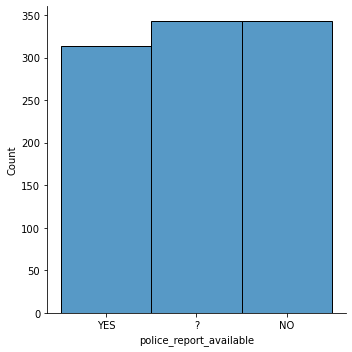

<Figure size 864x432 with 0 Axes>

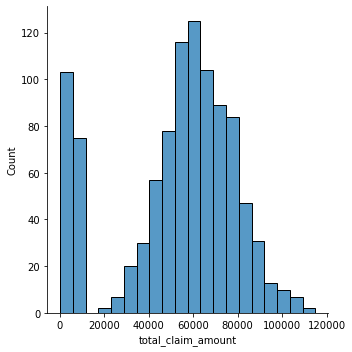

<Figure size 864x432 with 0 Axes>

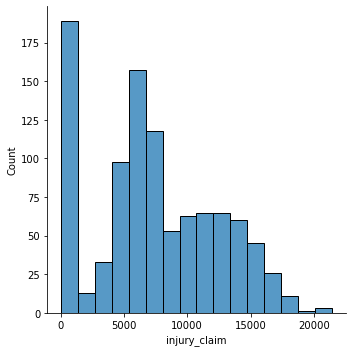

<Figure size 864x432 with 0 Axes>

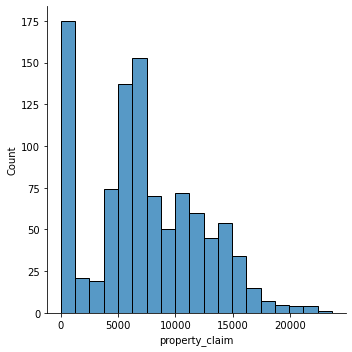

<Figure size 864x432 with 0 Axes>

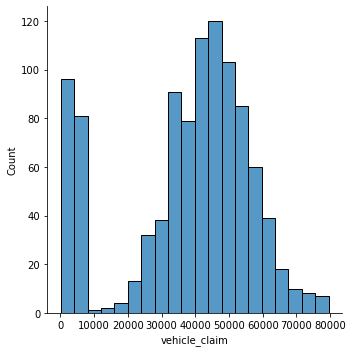

<Figure size 864x432 with 0 Axes>

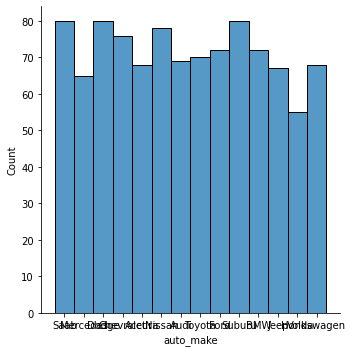

<Figure size 864x432 with 0 Axes>

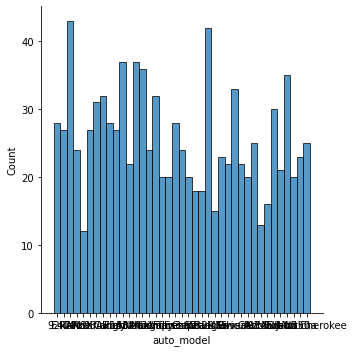

<Figure size 864x432 with 0 Axes>

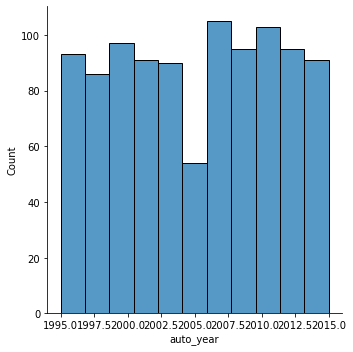

<Figure size 864x432 with 0 Axes>

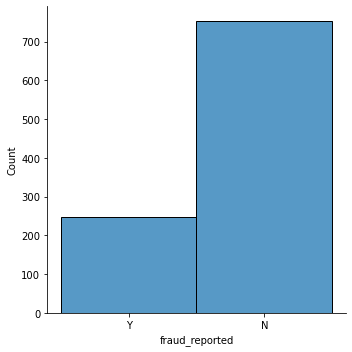

In [11]:
for i in df:
    plt.figure(figsize=(12,6))
    sns.displot(df[i])
    plt.show()

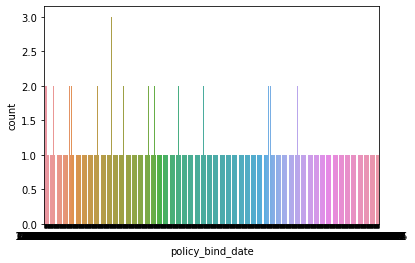

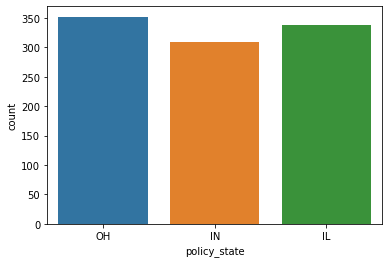

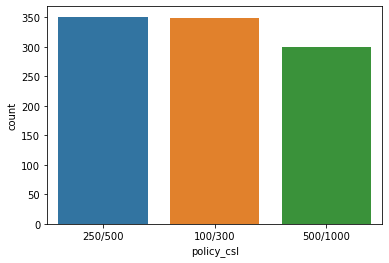

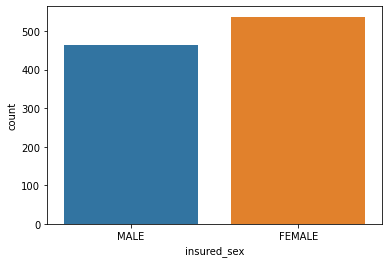

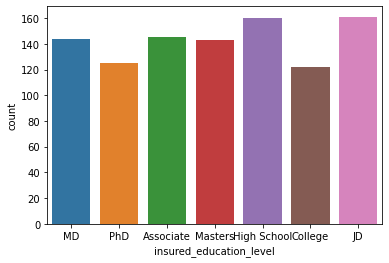

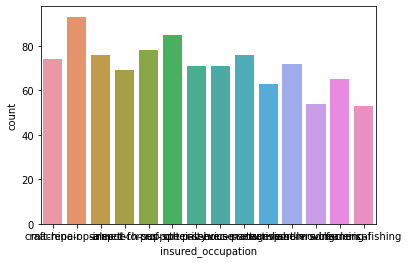

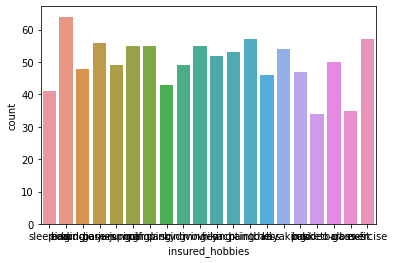

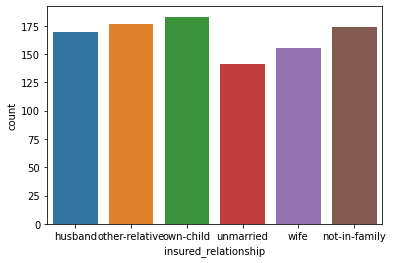

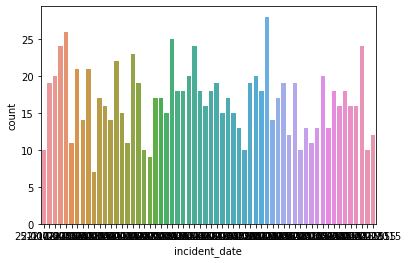

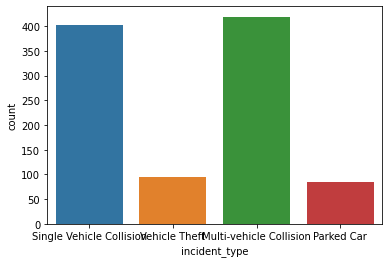

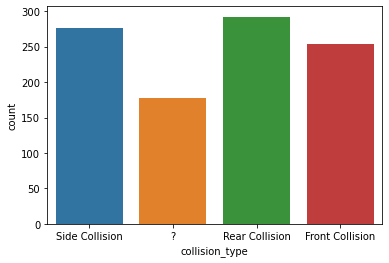

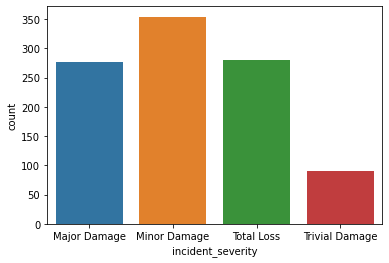

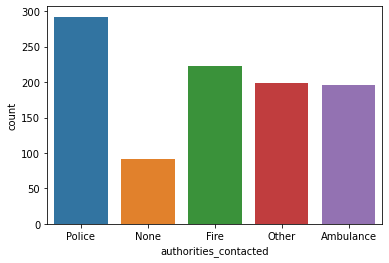

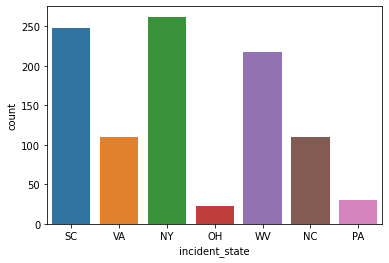

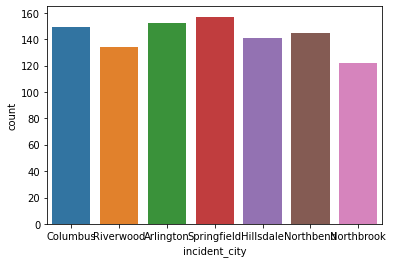

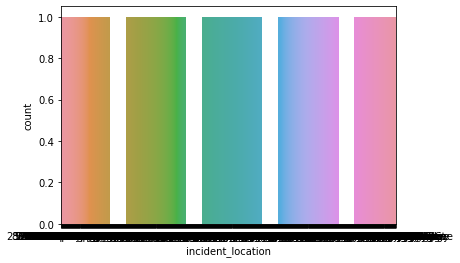

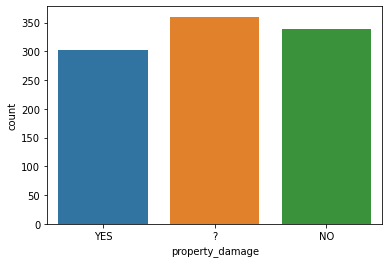

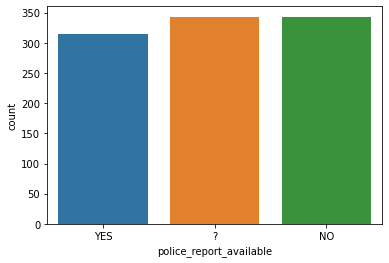

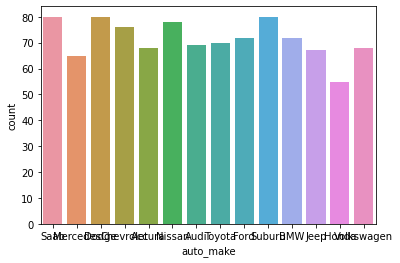

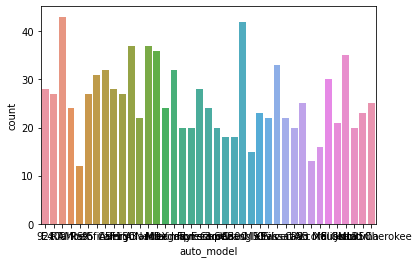

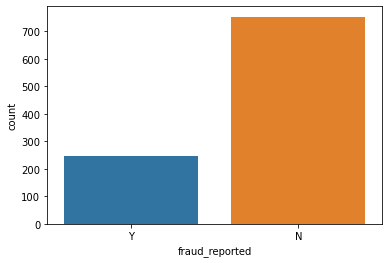

In [12]:
for i in df:
    if df[i].dtypes=="object":
        sns.countplot(df[i])
        plt.show()

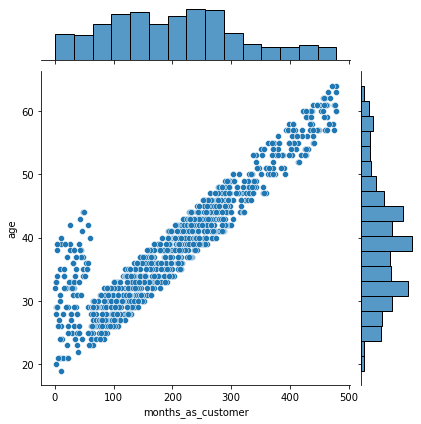

In [13]:
sns.jointplot(data=df, x="months_as_customer", y="age")

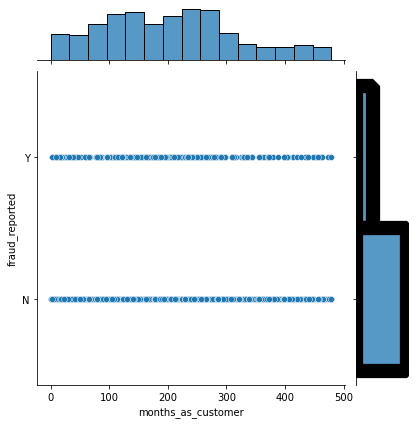

In [14]:
sns.jointplot(data=df, x="months_as_customer", y="fraud_reported")

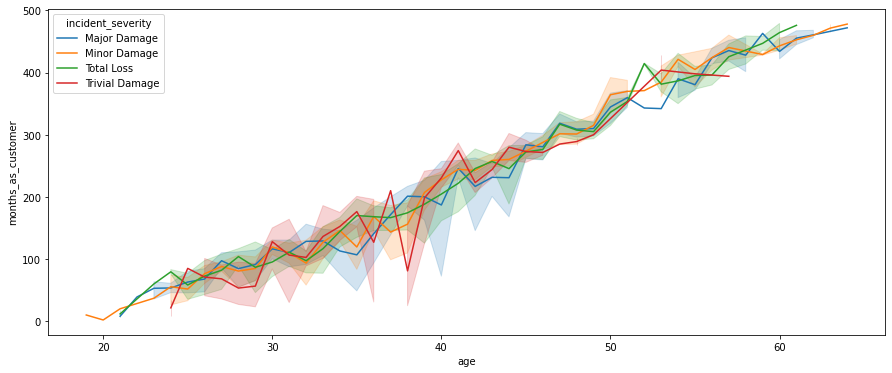

In [15]:
plt.figure(figsize=(15,6))
sns.lineplot(x='age',y='months_as_customer',hue='incident_severity',data=df)
plt.show()

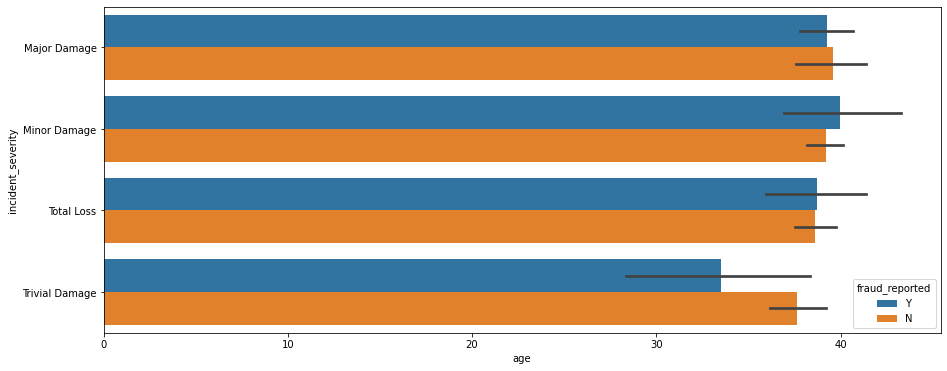

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(x='age',y='incident_severity',hue='fraud_reported',data=df)
plt.show()

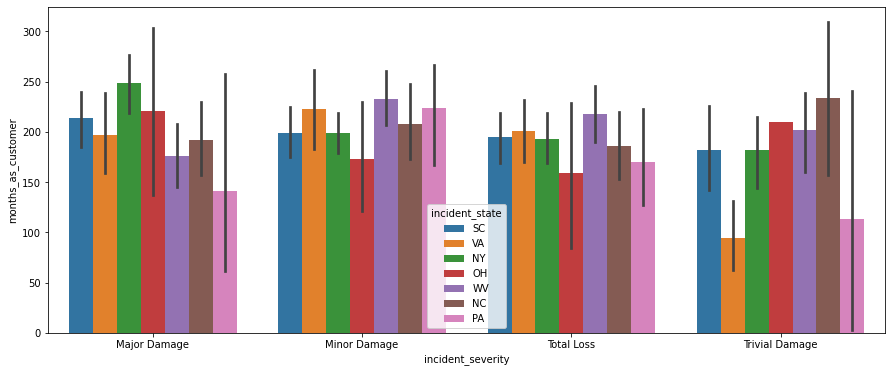

In [17]:
plt.figure(figsize=(15,6))
sns.barplot(x='incident_severity',y='months_as_customer',hue='incident_state',data=df)
plt.show()

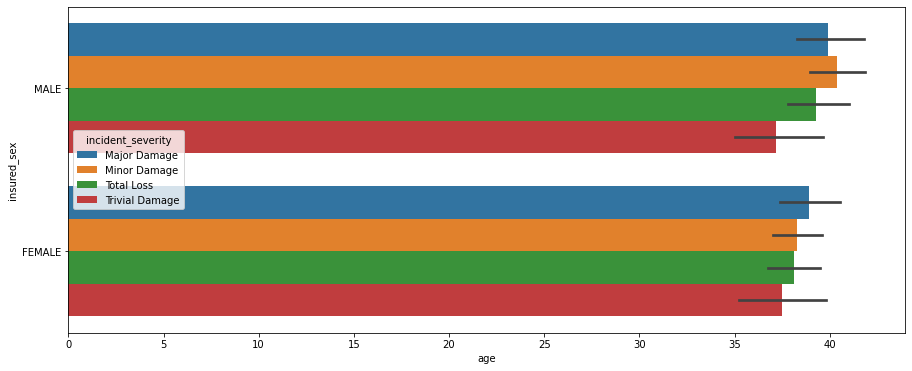

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(x='age',y='insured_sex',hue='incident_severity',data=df)
plt.show()

## Statistical Summary:

In [19]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


## Data Processing and Feature Engineering:

In [22]:
                                         ''' Replacing categorical data '''

# We are replacing values from the column "property_damage" and "police_report_available".
df['property_damage'].replace('YES', 1, inplace=True)
df['property_damage'].replace('NO', 0, inplace=True)
df['property_damage'].replace('?', 0, inplace=True)
df['police_report_available'].replace('YES', 1, inplace=True)
df['police_report_available'].replace('NO',0, inplace=True)
df['police_report_available'].replace('?', 0, inplace=True)
df['fraud_reported'].replace('Y', 1, inplace = True)
df['fraud_reported'].replace('N', 0, inplace = True)

In [23]:
                                         ''' Converting the datatype '''

#We are converting the dtype of "insured_zip" into object

df[['insured_zip']] = df[['insured_zip']].astype(object)

In [24]:
                                          ''' Creating new columns '''

# we are creating seperate columns from "policy_csl" column

df['Policy_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['Policy_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [25]:
                                          ''' Dropping the columns '''

# here we are dropping the columns which do not contribute

df.drop(columns = ['policy_number'], inplace = True)
df.drop(columns = ['policy_bind_date'], inplace = True)
df.drop(columns = ['policy_csl'], inplace = True)
df.drop(columns = ['auto_year'], inplace = True)
df.drop(columns = ['incident_date'], inplace = True)
df.drop(columns = ['insured_zip'], inplace = True)

### Correlation:

In [26]:
df.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.020544
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.012143
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,0.014817
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,-0.014480
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,0.058622
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,-0.016406,0.061643,-0.000616,0.055829,-0.017651,-0.012939,0.015980,0.025934,-0.000779,0.015836,-0.019173
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,0.016981,-0.024418,-0.041330,-0.039256,-0.036060,-0.046060,-0.022863,-0.032665,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,-0.016406,-0.025054,1.000000,0.120794,0.064425,-0.034563,0.006527,0.040558,0.217702,0.165768,0.179536,0.215626,0.004316
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,0.120794,1.000000,-0.013641,0.014030,-0.014669,-0.007291,0.274278,0.224650,0.219084,0.269393,0.051839
property_damage,0.005488,-0.003408,0.015770,0.080738,-0.076358,-0.000616,0.016981,0.064425,-0.013641,1.000000,0.003762,-0.019753,-0.022657,0.060597,0.048886,0.045211,0.060526,0.017202


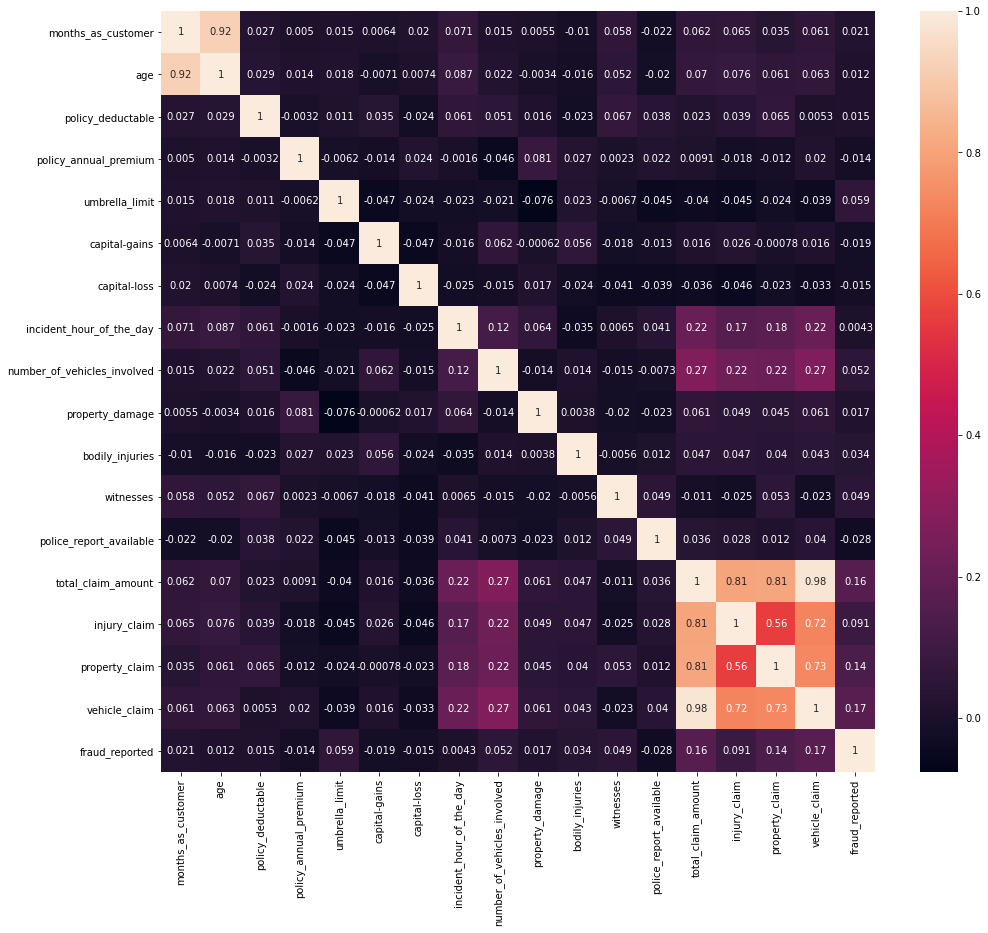

In [33]:
corr_hmap=df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr_hmap,annot=True)
plt.show()

### Removing Outliers:

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df[["age","policy_annual_premium","umbrella_limit","total_claim_amount","property_claim"]]))

In [34]:
new_df=df[(z<3).all(axis=1)]

In [35]:
new_df.shape

(981, 35)

In [36]:
df.shape

(1000, 35)

In [37]:
                                                    ''' Data Loss '''

Data_loss = ((1000-981)/1000)*100
Data_loss

1.9

The loss of data after removing the ouliers is 1.9%.

### Skewness:

In [38]:
new_df.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989
property_damage                0.854687
bodily_injuries                0.001877
witnesses                      0.024567
police_report_available        0.797825
total_claim_amount            -0.595242
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.622528
fraud_reported                 1.189838
Policy_per_person              0.419579
Policy_per_accident            0.615942
dtype: float64

## Encoding:

We are using Label Encoder to convert all the categorical values into numeric

In [40]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object" :
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [41]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                   float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_location              float64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int64
bodily_injuries                  int64
witnesses                        int64
police_report_available  

### Spliting the data into Feature and Target:

In [42]:
x = df.drop(columns = 'fraud_reported')
y = df['fraud_reported']

In [43]:
x.shape

(1000, 34)

In [44]:
y.shape

(1000,)

In [45]:
x

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,Policy_per_person,Policy_per_accident
0,328,48,2.0,1000,1406.91,0,1.0,4.0,2.0,17.0,...,2,1,71610,6510,13020,52080,10.0,1.0,1.0,2.0
1,228,42,1.0,2000,1197.22,5000000,1.0,4.0,6.0,15.0,...,0,0,5070,780,780,3510,8.0,12.0,1.0,2.0
2,134,29,2.0,2000,1413.14,5000000,0.0,6.0,11.0,2.0,...,3,0,34650,7700,3850,23100,4.0,30.0,0.0,1.0
3,256,41,0.0,2000,1415.74,6000000,0.0,6.0,1.0,2.0,...,2,0,63400,6340,6340,50720,3.0,34.0,1.0,2.0
4,228,44,0.0,1000,1583.91,6000000,1.0,0.0,11.0,2.0,...,1,0,6500,1300,650,4550,0.0,31.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,1000,1310.80,0,0.0,5.0,2.0,13.0,...,1,0,87200,17440,8720,61040,6.0,6.0,2.0,0.0
996,285,41,0.0,1000,1436.79,0,0.0,6.0,9.0,17.0,...,3,0,108480,18080,18080,72320,13.0,28.0,0.0,1.0
997,130,34,2.0,500,1383.49,3000000,0.0,5.0,1.0,3.0,...,3,1,67500,7500,7500,52500,11.0,19.0,1.0,2.0
998,458,62,0.0,2000,1356.92,5000000,1.0,0.0,5.0,0.0,...,1,1,46980,5220,5220,36540,1.0,5.0,2.0,0.0


In [46]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

### Scalling:

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [48]:
                                            ''' Importing all the required libraries '''
    
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

In [49]:
lc=LogisticRegression()
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lc.fit(x_train,y_train)
    pred=lc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("We are getting the Best Accuracy is",maxAccu," on Random_state",maxRS)

We are getting the Best Accuracy is 0.85  on Random_state 162


### Train Test Split the data:

We got the We got the Best Accuracy is 0.85  on Random_state 162. Hence, using these values we are going to train our data using following models :-

Logostic Regression

Decision Tree Classifier

Random Forest Classifier

GaussianNB

KNeighbors Classifier

Gradient Boosting Classifier

SVC

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=162)

In [51]:
x_train.shape

(750, 34)

In [52]:
x_test.shape

(250, 34)

In [53]:
y_train.shape

(750,)

In [55]:
y_test.shape

(250,)

In [58]:
                                                   ''' Logistic Regression '''

lc=LogisticRegression()
lc.fit(x_train,y_train)
pred=lc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the CV score
cv=cross_val_score(lc,x,y,cv=5).mean()
print("Cross Validation Score for Logistic Regression is : ",cv)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cv
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 0.832
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[186  12]
 [ 30  22]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       198
           1       0.65      0.42      0.51        52

    accuracy                           0.83       250
   macro avg       0.75      0.68      0.71       250
weighted avg       0.82      0.83      0.82       250

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Cross Validation Score for Logistic Regression is :  0.772
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.05999999999999994


In [59]:
#Decision Tree Classifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvdt=cross_val_score(dt,x,y,cv=5).mean()
print("Cross Validation Score for Decision Tree Classifier is : ",cvdt)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvdt
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 0.74
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[152  46]
 [ 19  33]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.77      0.82       198
           1       0.42      0.63      0.50        52

    accuracy                           0.74       250
   macro avg       0.65      0.70      0.66       250
weighted avg       0.79      0.74      0.76       250

Cross Validation Score for Decision Tree Classifier is :  0.772
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : -0.03200000000000003


In [60]:
                                                ''' Random Forest Classifier '''

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvrf=cross_val_score(rf,x,y,cv=5).mean()
print("Cross Validation Score for Random Forest Classifier is : ",cvrf)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvrf
print("\nAccuracy Score - Cross Validation Score :", result)


Accuracy Score: 0.82
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[190   8]
 [ 37  15]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.96      0.89       198
           1       0.65      0.29      0.40        52

    accuracy                           0.82       250
   macro avg       0.74      0.62      0.65       250
weighted avg       0.80      0.82      0.79       250

Cross Validation Score for Random Forest Classifier is :  0.7569999999999999
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.06300000000000006


In [61]:
                                                    ''' GaussianNB ''' 

gb=GaussianNB()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvgb=cross_val_score(gb,x,y,cv=5).mean()
print("Cross Validation Score for GaussianNB is : ",cvgb)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvgb
print("\nAccuracy Score - Cross Validation Score :", result)



Accuracy Score: 0.748
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[151  47]
 [ 16  36]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.76      0.83       198
           1       0.43      0.69      0.53        52

    accuracy                           0.75       250
   macro avg       0.67      0.73      0.68       250
weighted avg       0.81      0.75      0.77       250

Cross Validation Score for GaussianNB is :  0.7120000000000001
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.03599999999999992


In [63]:
                                                  ''' KNeighbors Classifier '''

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print("Cross Validation Score for KNeighborsClassifier is : ",cvknn)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvknn
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 0.776
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[186  12]
 [ 44   8]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       198
           1       0.40      0.15      0.22        52

    accuracy                           0.78       250
   macro avg       0.60      0.55      0.55       250
weighted avg       0.72      0.78      0.73       250

Cross Validation Score for KNeighborsClassifier is :  0.7260000000000001
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.04999999999999993


In [65]:
                                              ''' Gradient Boosting Classifier '''

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvgbc=cross_val_score(gbc,x,y,cv=5).mean()
print("Cross Validation Score for Gradient Boosting Classifier is : ",cvgbc)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvgbc
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 0.876
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[181  17]
 [ 14  38]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       198
           1       0.69      0.73      0.71        52

    accuracy                           0.88       250
   macro avg       0.81      0.82      0.82       250
weighted avg       0.88      0.88      0.88       250

Cross Validation Score for Gradient Boosting Classifier is :  0.825
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.051000000000000045


In [66]:
                                                   '''  SVC  '''

svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=accuracy_score(y_test,pred)
cnm=confusion_matrix(y_test,pred)
cr=classification_report(y_test,pred)

# Getting the accuarcy score
print(f"Accuracy Score: {acc}")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the confusion matrix
print(f"Confusion Matrix : \n {cnm}\n")
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the classification report
print(f"Classification Report : \n {cr}")

# Getting the CV score
cvsvc=cross_val_score(svc,x,y,cv=5).mean()
print("Cross Validation Score for SVC is : ",cvsvc)
print(" --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- ")

# Getting the difference between the accuracy score and CV score
result = acc - cvsvc
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 0.792
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Confusion Matrix : 
 [[197   1]
 [ 51   1]]

 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 
Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.99      0.88       198
           1       0.50      0.02      0.04        52

    accuracy                           0.79       250
   macro avg       0.65      0.51      0.46       250
weighted avg       0.73      0.79      0.71       250

Cross Validation Score for SVC is :  0.7459999999999999
 --:--  --:--  --:--  --:--  --:--  --:--  --:--  --:-- 

Accuracy Score - Cross Validation Score : 0.04600000000000015


### Overfitting & Underfitting:

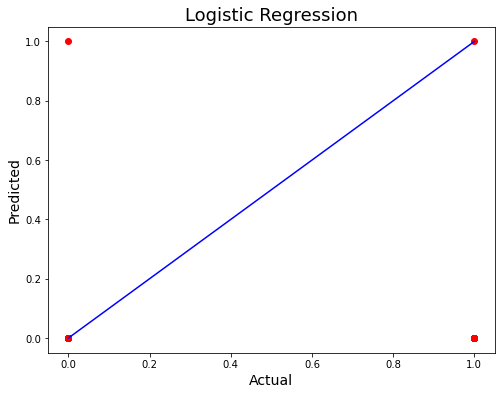

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()

### Hyper Parameter Tuning:

We are selecting Decision Tree Classifier as our best model as it has least difference between it's Accuracy score and CV score.

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameter={'criterion':['gini', 'entropy'] ,
           'max_depth':np.arange(2,20), 
           'max_leaf_nodes':[1,2,3,4,5,6],
           'splitter':['best','random']}

In [70]:
GCV=GridSearchCV(dt,parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6],
                         'splitter': ['best', 'random']})

In [71]:
''' Getting the best parameters using GridSearchCV '''

GCV.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 4, 'splitter': 'best'}

In [72]:
autoins_final=DecisionTreeClassifier(criterion='gini', max_depth=3, max_leaf_nodes=4, splitter='best')
autoins_final.fit(x_train,y_train)
pred=autoins_final.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.0


### We are getting the model accuracy and cross validation score both as 90.0% which shows our model is performing well.

### AUC - ROC Curve:

AUC Curve - A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

ROC Curves - It summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

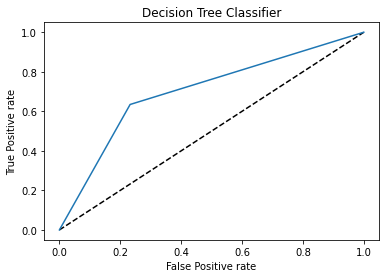

0.7011460761460762


In [73]:
y_pred_proba= dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='dtr')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Decision Tree Classifier')
plt.show()

# Getting the AUC score
auc_score=roc_auc_score(y_test,dt.predict(x_test))
print(auc_score)

### Saving the model:

In [74]:
import joblib
joblib.dump(autoins_final,"Insurance_Claims_Fraud_Detection.pkl")

['Insurance_Claims_Fraud_Detection.pkl']

In [75]:
autoins_model = joblib.load(open('Insurance_Claims_Fraud_Detection.pkl','rb'))
result = autoins_model.score(x_test,y_test)
print(result)

0.9


In [77]:
Conclusion = pd.DataFrame([autoins_model.predict(x_test)[:],dt.predict(x_test)[:]],index=["Predicted","Original"])

In [78]:
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
Predicted,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,0,1,0,0
Original,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,0,0


                                                     ---- --:-- ----